### Importing the required libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
# %config InlineBackend.figure_formats = ['retina'] #include it if you have high denisty retina display
import seaborn as sns 
import plotly.offline as py 
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True) 
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


### Loading the dataset

In [9]:
df=pd.read_csv('sample30.csv')
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


### Exploratory data analysis and Data cleaning

In [10]:
#data overview in terms of row and columns 
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])

rows:  30000
columns:  15


In [11]:
# Getting the features
print('\nfeatures: ', df.columns.to_list())


features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']


In [12]:
# Getting the missing values
print('\nmissing vlues: ', df.isnull().values.sum())


missing vlues:  74980


In [13]:
# Getting the unique values
print('Unique values:\n', df.nunique())

Unique values:
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [14]:
# Getting the data types of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [15]:
# Dropping the rows having null values for reviews text
df = df.dropna(subset=['reviews_text'])

In [16]:
# Getting the sum of missing values in each columns
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [17]:
# Getting the duplicate reveiws
df['reviews_text'].value_counts()[10:50]

this product is so easy to use just open and use on all of your hard tables and chairs when ever you go out.                                                                                                                                                                                                                                                                                                                                                                 3
I use this for everything especially for clean up after kids and pets! I purchase this regularly!                                                                                                                                                                                                                                                                                                                                                                            3
This is fantastic product - just pull a wipe and you can clean almost any 

### Distribution of Ratings

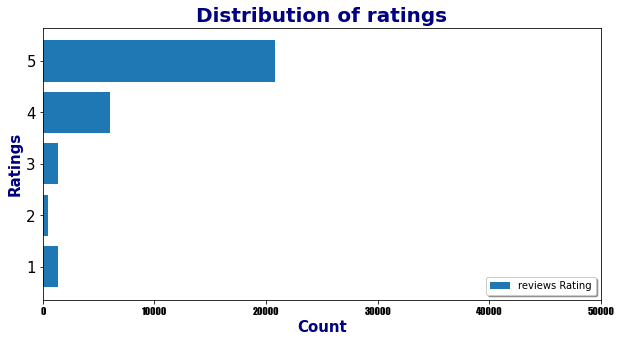

In [18]:
#plot ratings frequency
plt.figure(figsize=[10,5])
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=15)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['reviews Rating'], shadow=True, loc=4)

### Specific words used in reviews


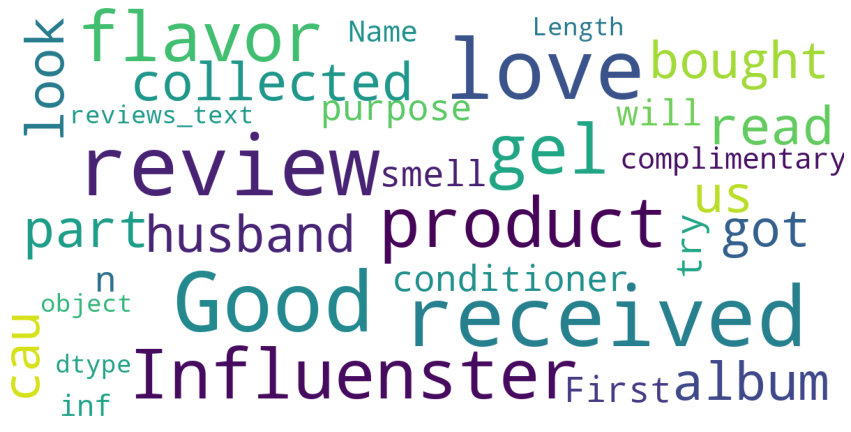

In [19]:
# Getting word cloud of review given by the user to a particular product 

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=300,
        max_font_size=40,
        scale=3,
        random_state=1 ).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['reviews_text'])    

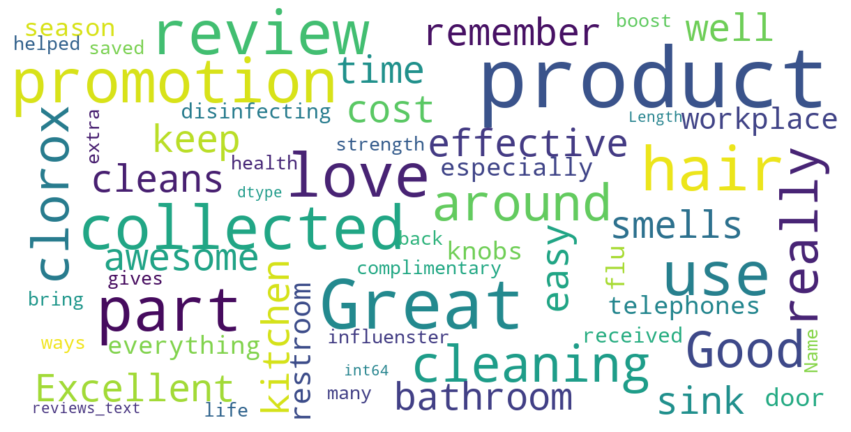

In [20]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Getting counts of titles of the reviews
df['reviews_title'].value_counts()

Great Product                       384
Great movie                         361
Clorox Wipes                        278
Great                               221
Great product                       205
                                   ... 
Keeping them healthy!                 1
Fighting Power                        1
great all together                    1
Great Product and Easy to Use...      1
Conditioned into healthy              1
Name: reviews_title, Length: 18535, dtype: int64

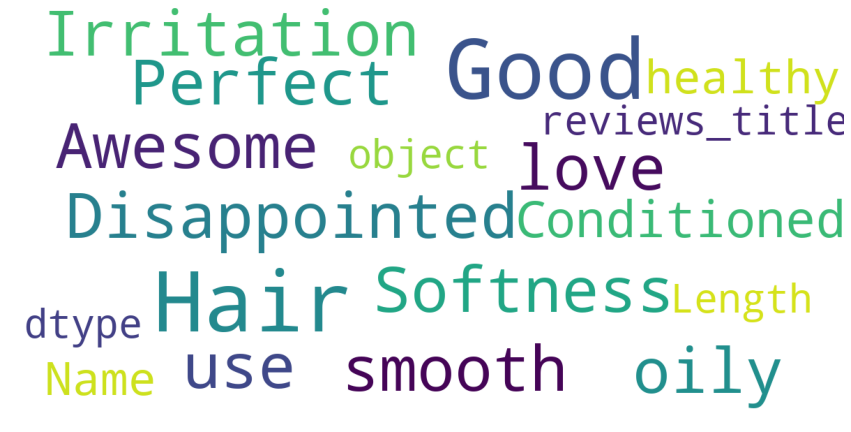

In [22]:
# Getting the word cloud of the title of the review given by the user to a particular product
show_wordcloud(df['reviews_title'])

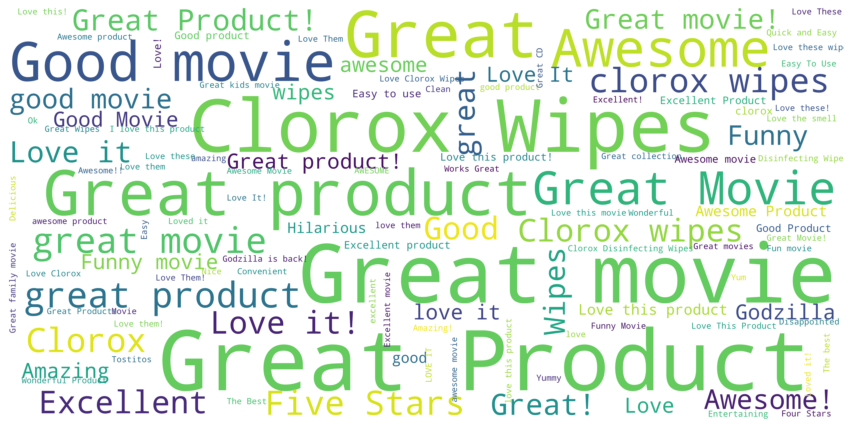

In [23]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=
                     40, scale=30, random_state=1).generate_from_frequencies((df['reviews_title'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

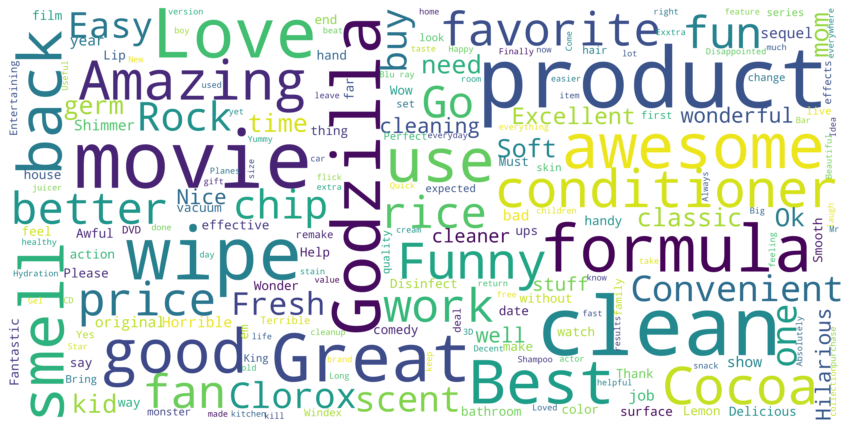

In [24]:
# Tokenizing to individual word (uni-gram) - review_title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews_title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
len(big_list)

95745

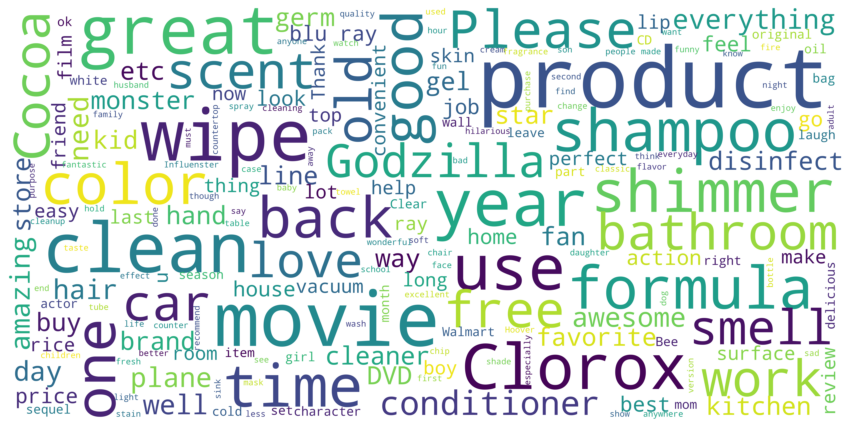

In [26]:
# Tokenizing to individual word (uni-gram) - reviews_text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews_text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
len(big_list)

1031591

In [28]:
''' Getting the counts of Category of the product like household essentials, books, personal care products, 
medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, 
# health care products and many more. '''

df['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

In [29]:
# getting the count of name of the product to which user has added review or rating
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
                                                                                  ... 
5302050 15/16 FCT/HOSE ADAPTOR                                                       1
Clorox Ultimate Care Premium Bleach                                                  1
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174                    1
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct                                       1
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                            1
Name: name, Length: 271, dtype: int64

### Whether a particular user has purchased the product or not and is review coming from shoppers who did purchase the products


In [30]:
#on the reviews.didpurchase column, replace 38,886 null filds with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)

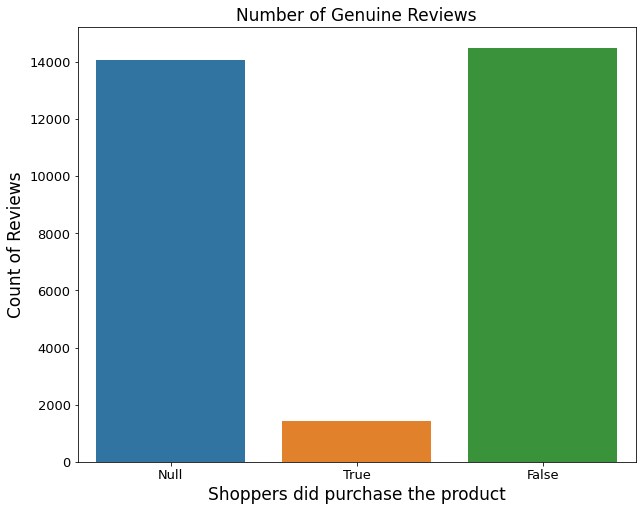

In [31]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)


In [32]:
df['reviews_didPurchase'].value_counts()

False    14498
Null     14068
True      1434
Name: reviews_didPurchase, dtype: int64

<h2> visualize the correlation map

In [33]:
# #not much info int the correlation map
# sns.set(font_scale=1.4)
# plt.figure(figsize=(10,5))
# sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=.5)

### Most popular product purchased

In [34]:
df1 = df[df['reviews_didPurchase'] == True]
df1['name'].value_counts()

Hormel Chili, No Beans                                                   91
Coty Airspun Face Powder, Translucent Extra Coverage                     87
Chester's Cheese Flavored Puffcorn Snacks                                77
Tostitos Bite Size Tortilla Chips                                        59
Lysol Concentrate Deodorizing Cleaner, Original Scent                    55
                                                                         ..
Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black                         1
RC Cola, 12oz                                                             1
Sizzix Framelits Dies 1by Tim Holtz Bird Crazy-Silver Asst Sizes          1
Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz     1
Bill Glor Gaither - Church In The Wildwood (cd)                           1
Name: name, Length: 144, dtype: int64

#### The "Hormel Chili, No Beans" is purchased almost 91 times

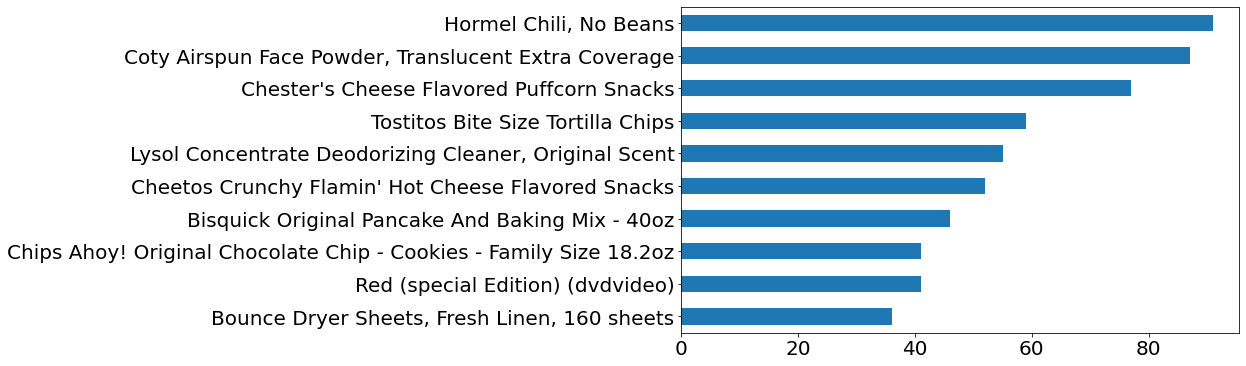

In [35]:
df1['name'].value_counts()[0:10].plot(kind='barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [36]:
# Filtering most purchased product with 5 star (highest) rating
df1 = df1[df1['name'] == "Hormel Chili, No Beans"]
df1 = df1[df1['reviews_rating']==5]
# Keeping relevant columns only
df1 = df1[[ 'reviews_rating', 'reviews_text']]
df1

,reviews_rating,reviews_text
6338,5,Taste and texture are perfect for a chili dog
6341,5,Lol. Never been asked to review a canned good....
6343,5,I purchased this for my special chili dogs. Th...
6344,5,Tastes great
6345,5,Great for canned chili. Even the kids will eat...
6346,5,Good
6352,5,Great for making chili dogs
6362,5,From the can or on a dog.Great anytime it is d...
6366,5,very good product good price fast delivery I a...
6367,5,This is the best canned chili ever! Quick and ...


## Feature extraction

### predictions of ratings

In [37]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text = df['reviews_text']
y = df['reviews_rating']

### Using the n-gram tf-idf vectorizer

In [38]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  # try 1,3
#     max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [39]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [40]:
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (21000, 572185)
y_train (21000,)
X_test (9000, 572185)
y_test (9000,)


## Training a text classification model

<h2> Model 1: Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train, y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() -time1
print('Time taken: {:.2f} seconds'.format(time_taken))

Time taken: 111.97 seconds


In [42]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.759
              precision    recall  f1-score   support

           1       0.57      0.95      0.71       238
           2       0.13      1.00      0.23        15
           3       0.12      0.94      0.21        53
           4       0.17      0.77      0.28       386
           5       0.99      0.75      0.85      8308

    accuracy                           0.76      9000
   macro avg       0.39      0.88      0.46      9000
weighted avg       0.94      0.76      0.82      9000

[[ 225    8    2    0    3]
 [   0   15    0    0    0]
 [   0    0   50    2    1]
 [   2    6   27  298   53]
 [ 168   89  352 1456 6243]]


<h2> Model2 : XGBoost


In [ ]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=1)
xgb.fit(X_train, y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time taken: {:.2f} seconds'.format(time_taken))

[11:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# Save the Model
# from sklearn.externals import joblib
import pickle

# Save the model as a pickle in a file 
# pickle.dump(xgb, 'XGB_SBPRS_model.pkl', 'wb') 
pickle.dump(xgb, open('XGB_SBPRS_model.pkl', 'wb'))

In [ ]:
# manual method to check accuracy, see first 100 predictions, around 76% correct prediction
for i in range(100):
    if preds2[i] == np.array(y_test)[i]:
        print('1', end=', ')   # correct prediction
    else:
        print('0', end=', ')   # wrong prediction

In [ ]:
# manual method to check accuracy, see some prediction of rating
preds2[0:100: 5]

In [ ]:
# manual method to check accuracy, see correct test label
np.array(y_test)[0:100: 5]

In [ ]:
#manuel method to check accuray, check on all 9000 test data set
correct = 0
wrong = 0
for i in range(9000):
    if preds2[i] == np.array(y_test)[i]:
        correct += 1
    else:
        wrong += 1
print(correct+wrong)
print(correct/9000)

In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, np.array(y_test)))

In [ ]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

<h2> Model3: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
time1 = time.time()
logit = LogisticRegression(C=1, multi_class = 'ovr')
logit.fit(X_train, y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

## Building a recommendation system

In [ ]:
#counting the no of unique categories
df['categories'].value_counts()

In [ ]:
# Counting values of unique names of products
df['name'].value_counts()

In [ ]:
# Counting values of unique values in dataset
df.nunique()

In [ ]:
# Getting the counts of the unique identification for individual user in the dataset
df['reviews_username'].value_counts()

In [ ]:
# Getting 10 popular products (from 271 unique products, 24914 users ) and plotting them
df['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
# List of user and favourite products only
df_user_product = df[['reviews_username', 'name', 'reviews_rating']]
df_user_product =df_user_product[df_user_product['reviews_rating'] ==5]
df_user_product = df_user_product.drop(columns=['reviews_rating'], axis=1)
df_user_product

In [ ]:
# Converting the dataframe to a CSV file
df_user_product.to_csv('df_user_product.csv', index= False)

In [ ]:
# Reading the file
from collections import defaultdict
from collections import Counter
import csv


In [ ]:
pd.read_csv('df_user_product.csv').head(10)

In [ ]:
user_product_map = defaultdict(list)
product_user_map = defaultdict(list)

In [ ]:
with open('df_user_product.csv', 'r') as csvfile:
    w = csv.reader(csvfile, delimiter=',')
    for row in w:
        user_product_map[row[0]].append(row[1])
        product_user_map[row[1]].append(row[0])

In [ ]:
df_user_product['reviews_username'].value_counts()

In [ ]:
df_user_product.nunique()

In [ ]:
user_product_map['mike']

In [ ]:
#all the users that liked (product as key):
product_user_map["Meguiar's Deep Crystal Car Wash 64-Oz."]

### User-based recommendation system

In [ ]:
def get_similar_product(user_product_map, product_user_map, m):
    biglist = []
    for u in product_user_map[m]: # Getting all user that liked that product
        biglist.extend(user_product_map[u]) # Find all other products those user's liked and add to biglist. 
    
    return Counter(biglist).most_common(20)[1:] # Using counter to 'count' the other products that show up most common


### Item-based recommendation system

In [ ]:
def get_product_recommendation(user_product_map, product_user_map,u1):
    biglist = []
    for m in user_product_map[u1]: # For the products a specific user likes
        for u in product_user_map[m]: # Getting other users who liked those products
            biglist.extend(user_product_map[u]) # Finding the other products those "similar folks" most liked
    return Counter(biglist).most_common(20) # Returning tuples of (most common id, count)

In [ ]:
get_similar_product(user_product_map, product_user_map, "Meguiars Interior Detailer Wipes 25ct") 

In [ ]:
get_product_recommendation(user_product_map, product_user_map, 'jess')

In [ ]:
pickle.dump(xgb, open('XGB_SBPRS_model_final.pkl', 'wb'))